In [ ]:
!pip install tensorflow

In [1]:
!pip install tensorflow-hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

2023-10-18 18:15:10.458058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("/Users/mdhouib/Documents/GitHub/zoomathia/classification_automatique/data/Pline_paragraph_translated.csv", sep=';', encoding='utf-8')
df.head()

,Unnamed: 0,Paragraph,Anatomy,ancient class,Anthroponym,Environment,Ethology,General description,peoples,Physiology,Place,Relationship between man and animal,Topic,Zoological information,Zoonyms,target_collection,english_text
0,0,Ad reliqua transeamus animalia et primum ter...,0,0,0,0,1,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","For the rest let us pass to the animals, and f..."
1,1,Auctores sunt in Mauretaniae saltibus ad que...,0,0,0,1,1,0,0,0,1,0,0,1,0,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0]","In the passes of Mauretania, their herds come ..."
2,2,Alienae quoque religionis intellectu credunt...,0,0,0,0,1,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",It is also believed by the foreign religious u...
3,3,Romae iuncti primum subiere currum Pompei Ma...,0,0,1,0,0,0,0,0,1,0,0,1,0,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]",Rome was first joined by the chariot of Pompey...
4,4,"Vulgare erat per auras arma iacere, non aufe...",0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","It was common to throw weapons to the winds, n..."


In [3]:
df['target_collection'] = df[['Anatomy',
                               'Place',
                                'Zoonyms']].values.tolist()

In [4]:
df_collection_pararaph=df[['english_text', 'target_collection']]

In [5]:
print(len(df_collection_pararaph))

764


In [6]:
# Split dataset into training and test set
train_size = int(df_collection_pararaph.shape[0] * 0.8)

train_df = df_collection_pararaph[:train_size]
test_df = df_collection_pararaph[train_size:]

In [7]:
# split text and labels
import numpy as np
train_sentences = train_df.english_text.to_numpy()
train_labels = train_df.target_collection#.to_numpy()
test_sentences = test_df.english_text.to_numpy()
test_sentences = np.array([np.array(val) for val in test_sentences])  # reconstruct
test_labels = test_df.target_collection.to_numpy()

In [8]:
train_labels = np.array([np.array(val) for val in train_labels])
print((train_labels))

[[0 0 0]
 [0 1 0]
 [0 0 0]
 ...
 [1 0 0]
 [1 1 0]
 [0 1 0]]


In [9]:
test_labels = np.array([np.array(val) for val in test_labels])
print((test_labels))

[[1 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 1]
 [1 0 1]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 1]
 [1 0 1]
 [0 0 1]
 [0 1 1]
 [0 1 1]
 [0 0 0]
 [1 0 1]
 [1 0 1]
 [1 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 1]
 [0 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [1 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 1]
 [0 0 1]
 [0 0 0]
 [0 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [1 0 1]
 [0 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 0]
 

In [10]:
print("Training entries: {}, test entries: {}".format(len(train_sentences), len(test_sentences)))

Training entries: 611, test entries: 153


In [11]:
print(train_labels.shape)

(611, 3)


In [13]:
model = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

2023-10-19 09:36:18.865072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
train_embedded= hub_layer(train_sentences)

In [15]:
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Activation
RNN = Sequential()
RNN.add(hub_layer)
#RNN.add(Dense(512, kernel_initializer='normal',activation='relu'))
RNN.add(Dense(80,kernel_initializer='normal', activation='relu'))
RNN.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [16]:
RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 80)                41040     
                                                                 
 dense_1 (Dense)             (None, 3)                 243       
                                                                 
Total params: 256,839,107
Trainable params: 256,839,107
Non-trainable params: 0
_________________________________________________________________


In [17]:
RNN.compile(optimizer='sgd',
            loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history = RNN.fit(train_sentences, train_labels,
                epochs=5,
                  batch_size=32,
                  validation_split=0.2, verbose=1)

Epoch 1/5
16/16 [==============================] - 15s 458ms/step - loss: 0.6961 - accuracy: 0.2152 - val_loss: 0.6958 - val_accuracy: 0.1138
Epoch 2/5
16/16 [==============================] - 7s 426ms/step - loss: 0.6940 - accuracy: 0.2541 - val_loss: 0.6939 - val_accuracy: 0.1138
Epoch 3/5
16/16 [==============================] - 7s 429ms/step - loss: 0.6920 - accuracy: 0.2623 - val_loss: 0.6920 - val_accuracy: 0.1545
Epoch 4/5
16/16 [==============================] - 8s 496ms/step - loss: 0.6901 - accuracy: 0.2623 - val_loss: 0.6901 - val_accuracy: 0.1626
Epoch 5/5
16/16 [==============================] - 7s 429ms/step - loss: 0.6881 - accuracy: 0.2807 - val_loss: 0.6883 - val_accuracy: 0.1870


In [19]:
print(test_labels.shape)
results = RNN.evaluate(test_sentences, test_labels)

print(results)

(153, 3)
5/5 [==============================] - 0s 16ms/step - loss: 0.6878 - accuracy: 0.2418
[0.687802255153656, 0.24183006584644318]


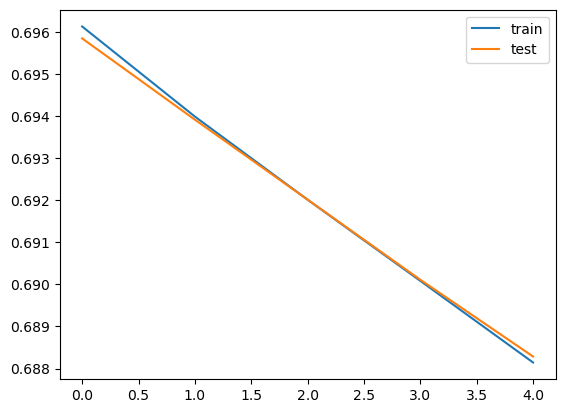

In [20]:
from matplotlib import pyplot
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()